# 使用V1版本回测

In [1]:
import sys
sys.path.append("../")
from utils.RollingLoadratePrice_utils_V1 import *

# 1) 处理市场数据
market_data = pd.read_parquet("../data/processed/shanxi_new.parquet",engine='fastparquet')
market_data = process_market_data(market_data, date_begin="2025-01-01", date_end="2025-08-05")
pred_csv_path="../save/curve_classify/multi_GRU_predict_results_V2.csv"
truth_csv_path="../data/processed/hiking_01_dataset.csv"
date_begin="2025-07-21" 
date_end="2025-08-05"

# 2) 直接从两个CSV构建curves_record
curves_record_match = build_curves_record_with_history_classify_from_csv(
    market_data=market_data,
    date_begin=date_begin,
    date_end=date_end,
    d=5,
    pred_csv_path=pred_csv_path,  
    truth_csv_path=truth_csv_path,            
    selection="match",   # 或 'baseline' / 'pos_only' / 'neg_only'
)

curves_record_baseline = build_curves_record_with_history_classify_from_csv(
    market_data=market_data,
    date_begin=date_begin,
    date_end=date_end,
    d=5,
    pred_csv_path=pred_csv_path,  
    truth_csv_path=truth_csv_path,            
    selection="baseline",   # 或 'baseline' / 'pos_only' / 'neg_only'
)


# 3) 查看CSV中哪些是预测错的、哪些是预测对的
correct, wrong = split_correct_wrong_by_csv(
    csv_path=pred_csv_path,
    date_begin=date_begin,
    date_end=date_end,
)


Index(['price', '实时价格', '实时在线机组容量(MW)', '实时负荷率(%)', '非市场化机组出力-日内(MW)',
       '联络线计划-日内(MW)', '竞价空间-日内(MW)', '频率实际值(MW)', '实际上旋备用(MW)', '实际下旋备用(MW)',
       '省调负荷-日内(MW)', '新能源负荷-日内(MW)', '实时风电(MW)', '实时光伏(MW)', '水电出力值-日内(MW)',
       '日前在线机组容量(MW)', '日前负荷率(%)', '非市场化机组出力-日前(MW)', '联络线计划-日前(MW)',
       '竞价空间-日前(MW)', '省调负荷-日前(MW)', '新能源负荷-日前(MW)', '正备用-日前(MW)',
       '新能源负荷备用-日前(MW)', '日前光伏(MW)', '日前风电(MW)'],
      dtype='object')


预测正确： ['2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24', '2025-07-27', '2025-07-28', '2025-07-29', '2025-08-02', '2025-08-03', '2025-08-04']
预测错误： ['2025-07-25', '2025-07-26', '2025-07-30', '2025-07-31', '2025-08-01', '2025-08-05']


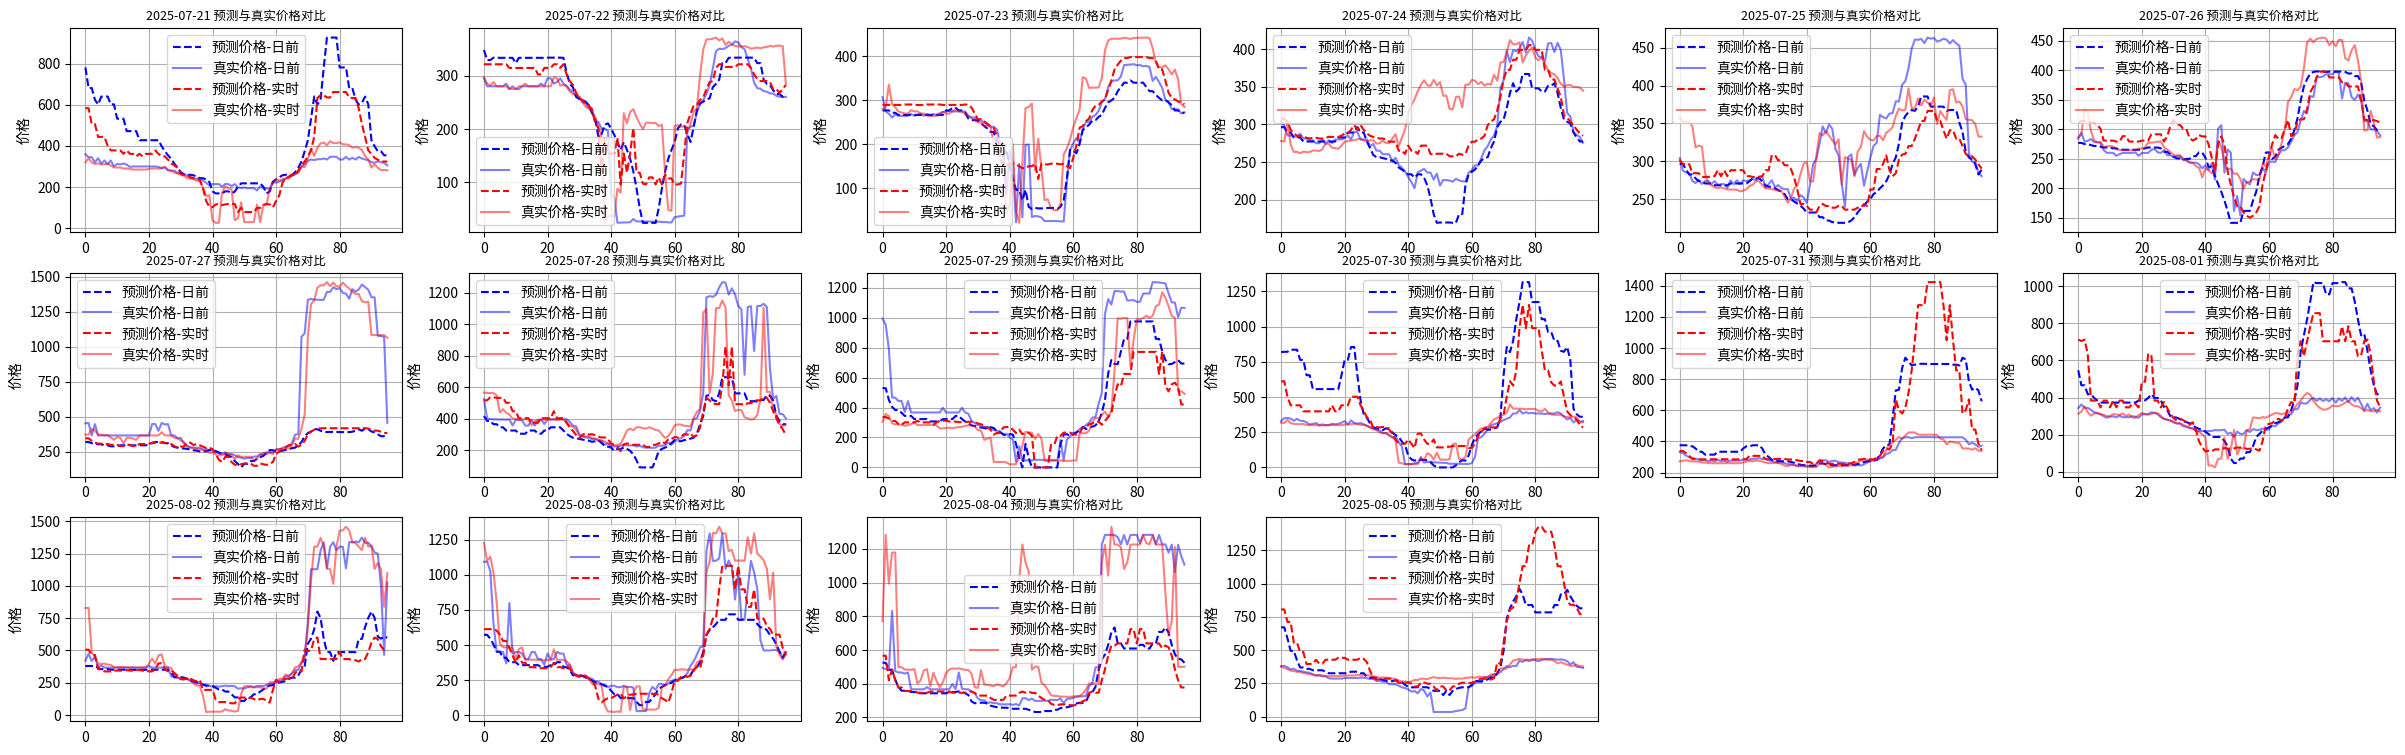

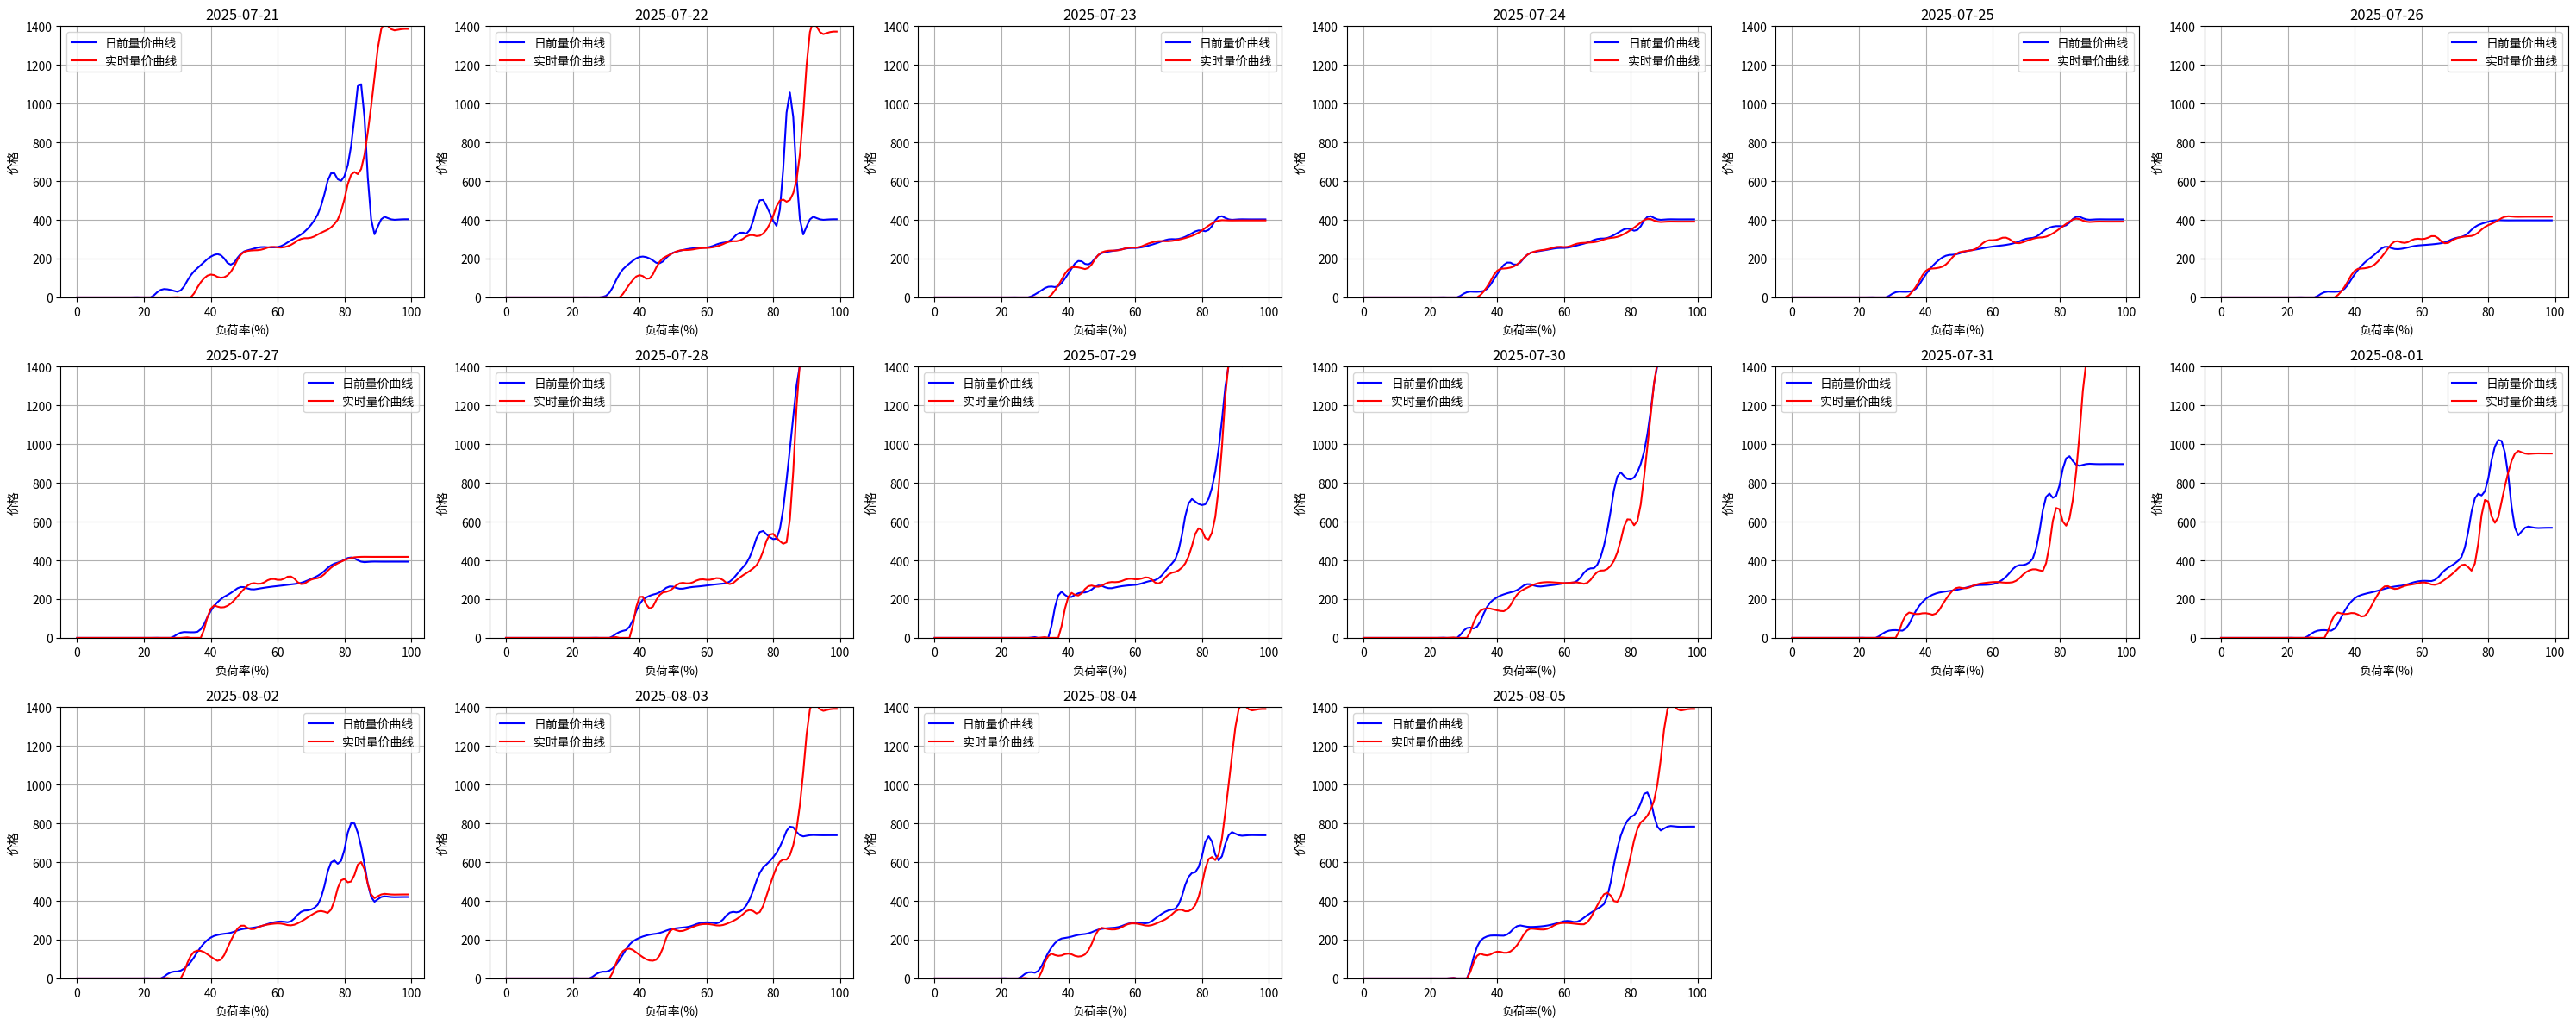

In [2]:
print("预测正确：", correct)
print("预测错误：", wrong)

plot_compare_predict_vs_true(curves_record_baseline)
plot_loadrate_price_curves(curves_record_baseline)

预测正确： ['2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24', '2025-07-27', '2025-07-28', '2025-07-29', '2025-08-02', '2025-08-03', '2025-08-04']
预测错误： ['2025-07-25', '2025-07-26', '2025-07-30', '2025-07-31', '2025-08-01', '2025-08-05']


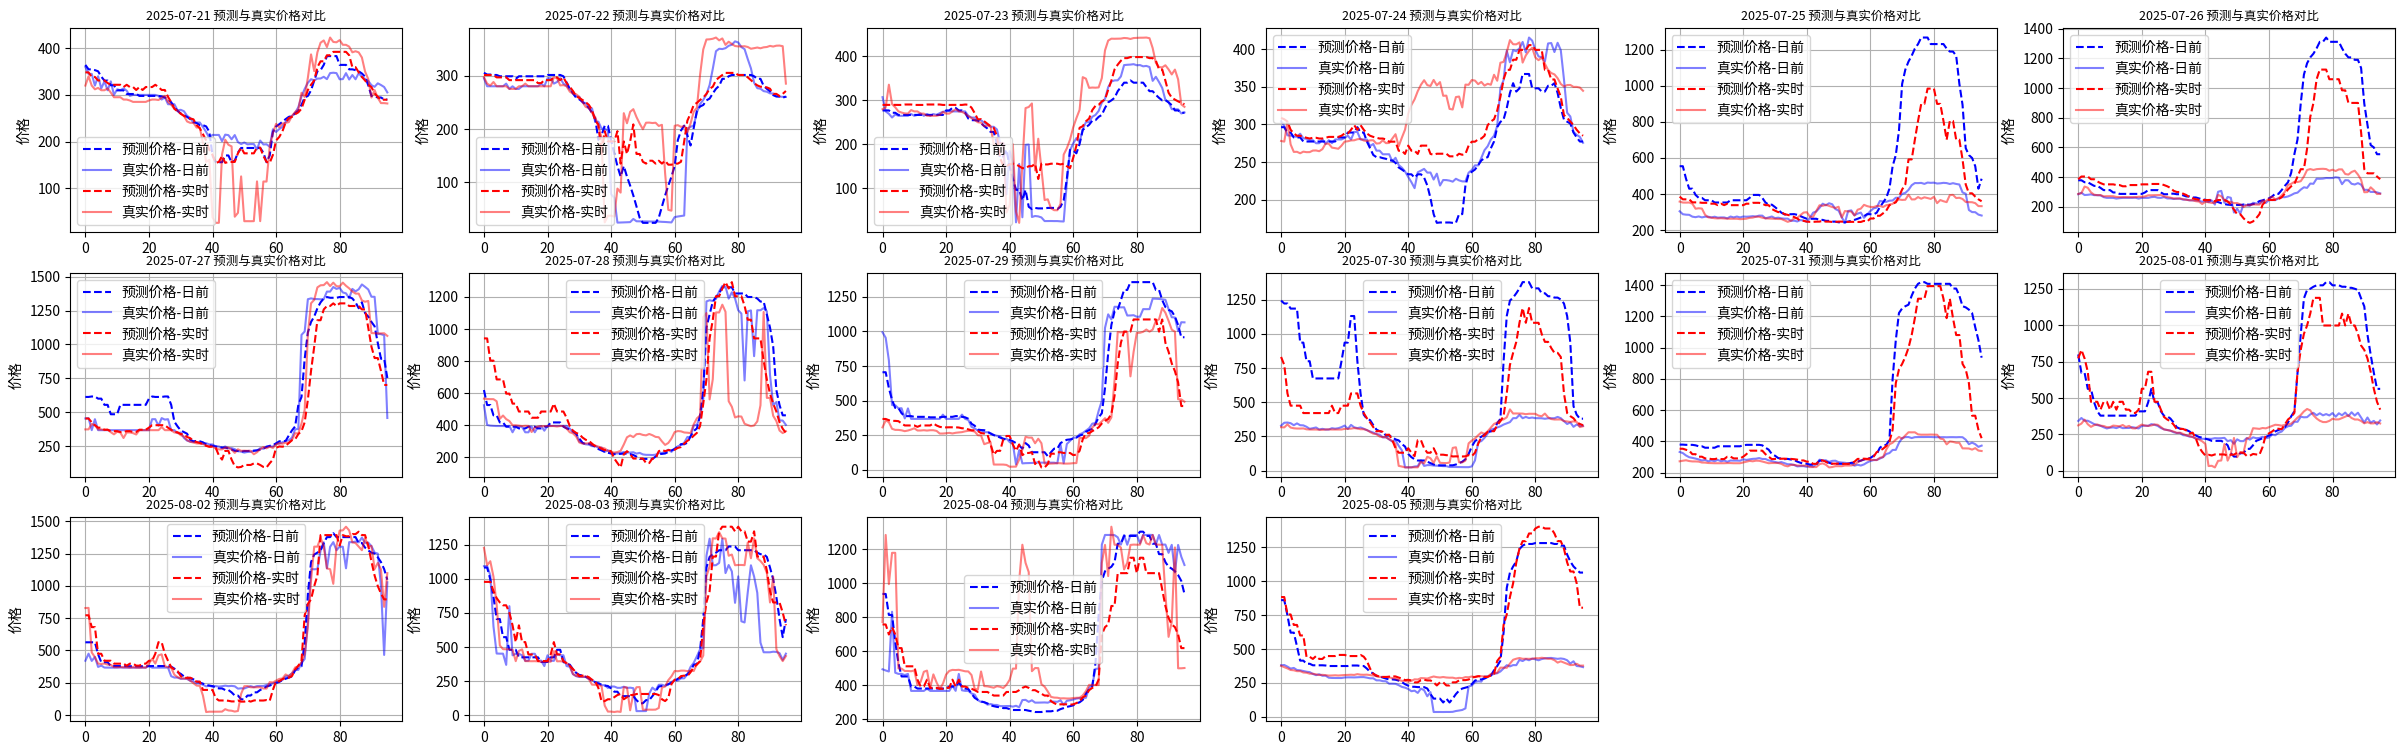

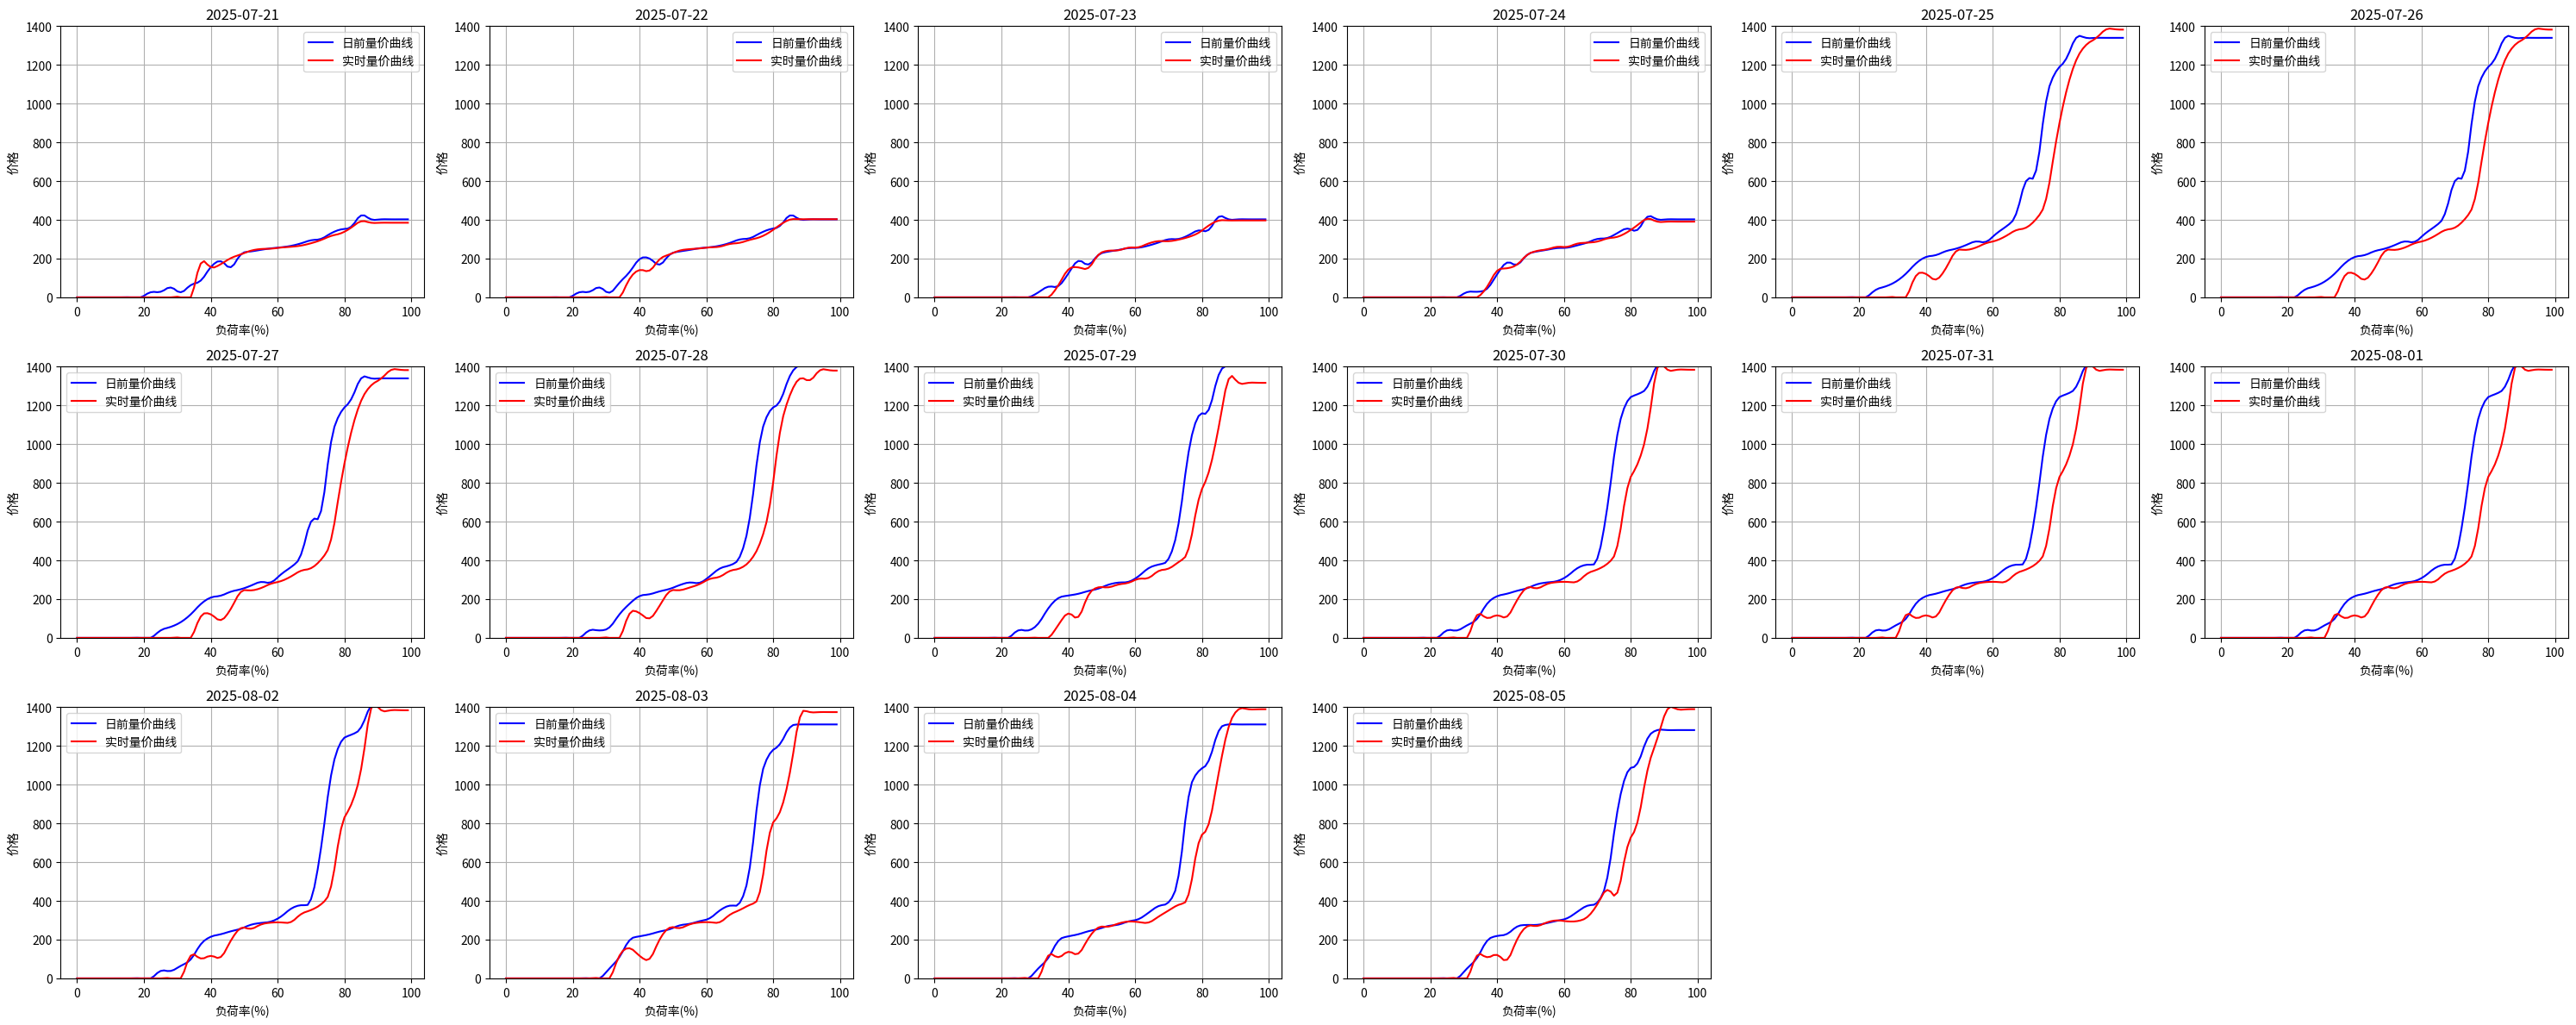

In [3]:
print("预测正确：", correct)
print("预测错误：", wrong)

plot_compare_predict_vs_true(curves_record_match)
plot_loadrate_price_curves(curves_record_match)

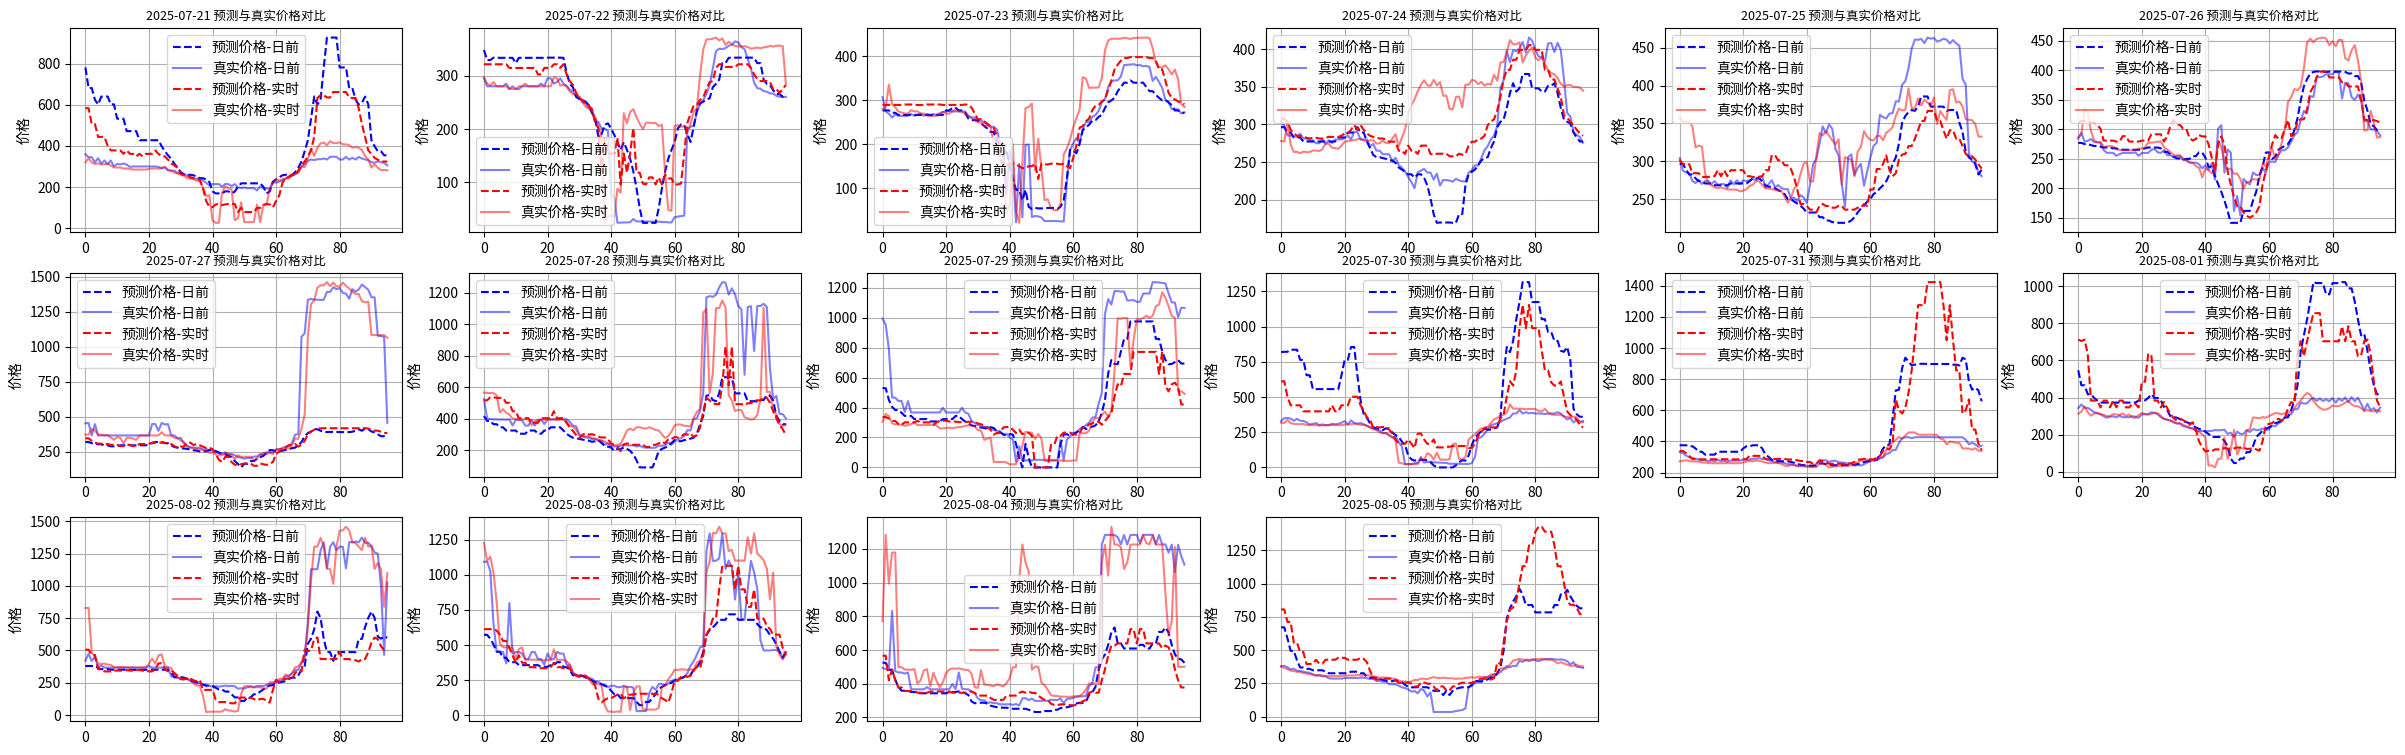

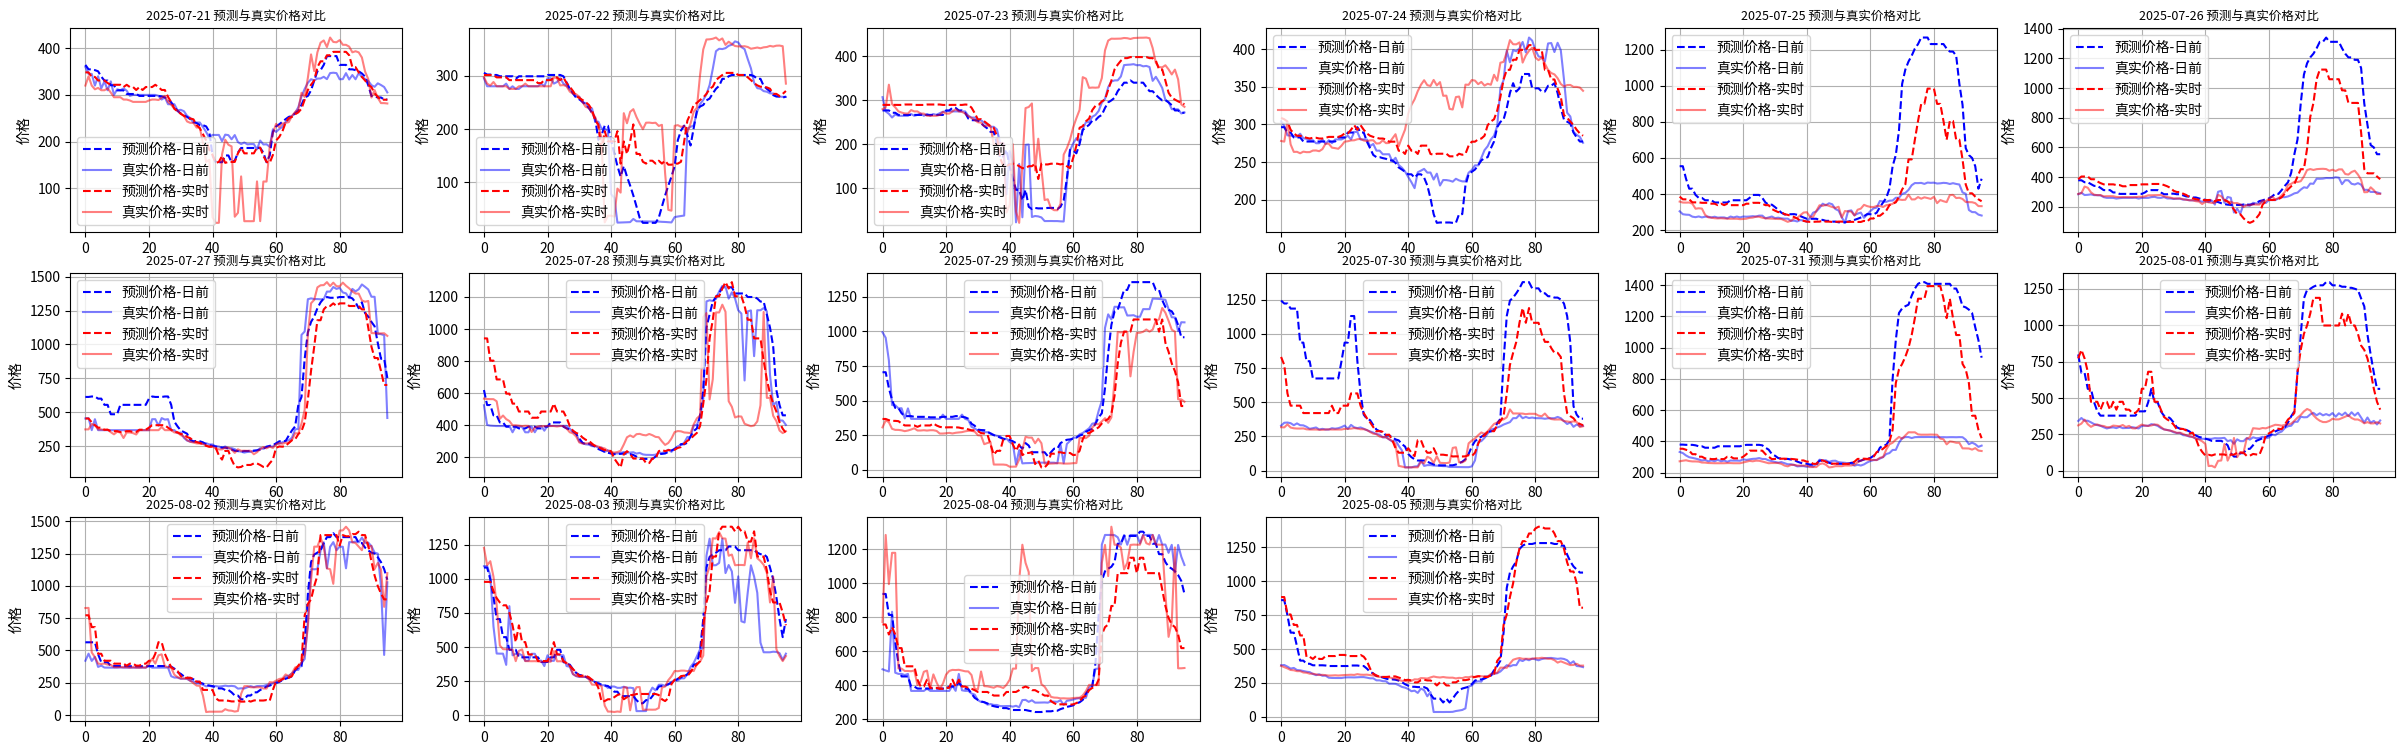

In [4]:
plot_compare_predict_vs_true(curves_record_baseline)
plot_compare_predict_vs_true(curves_record_match)

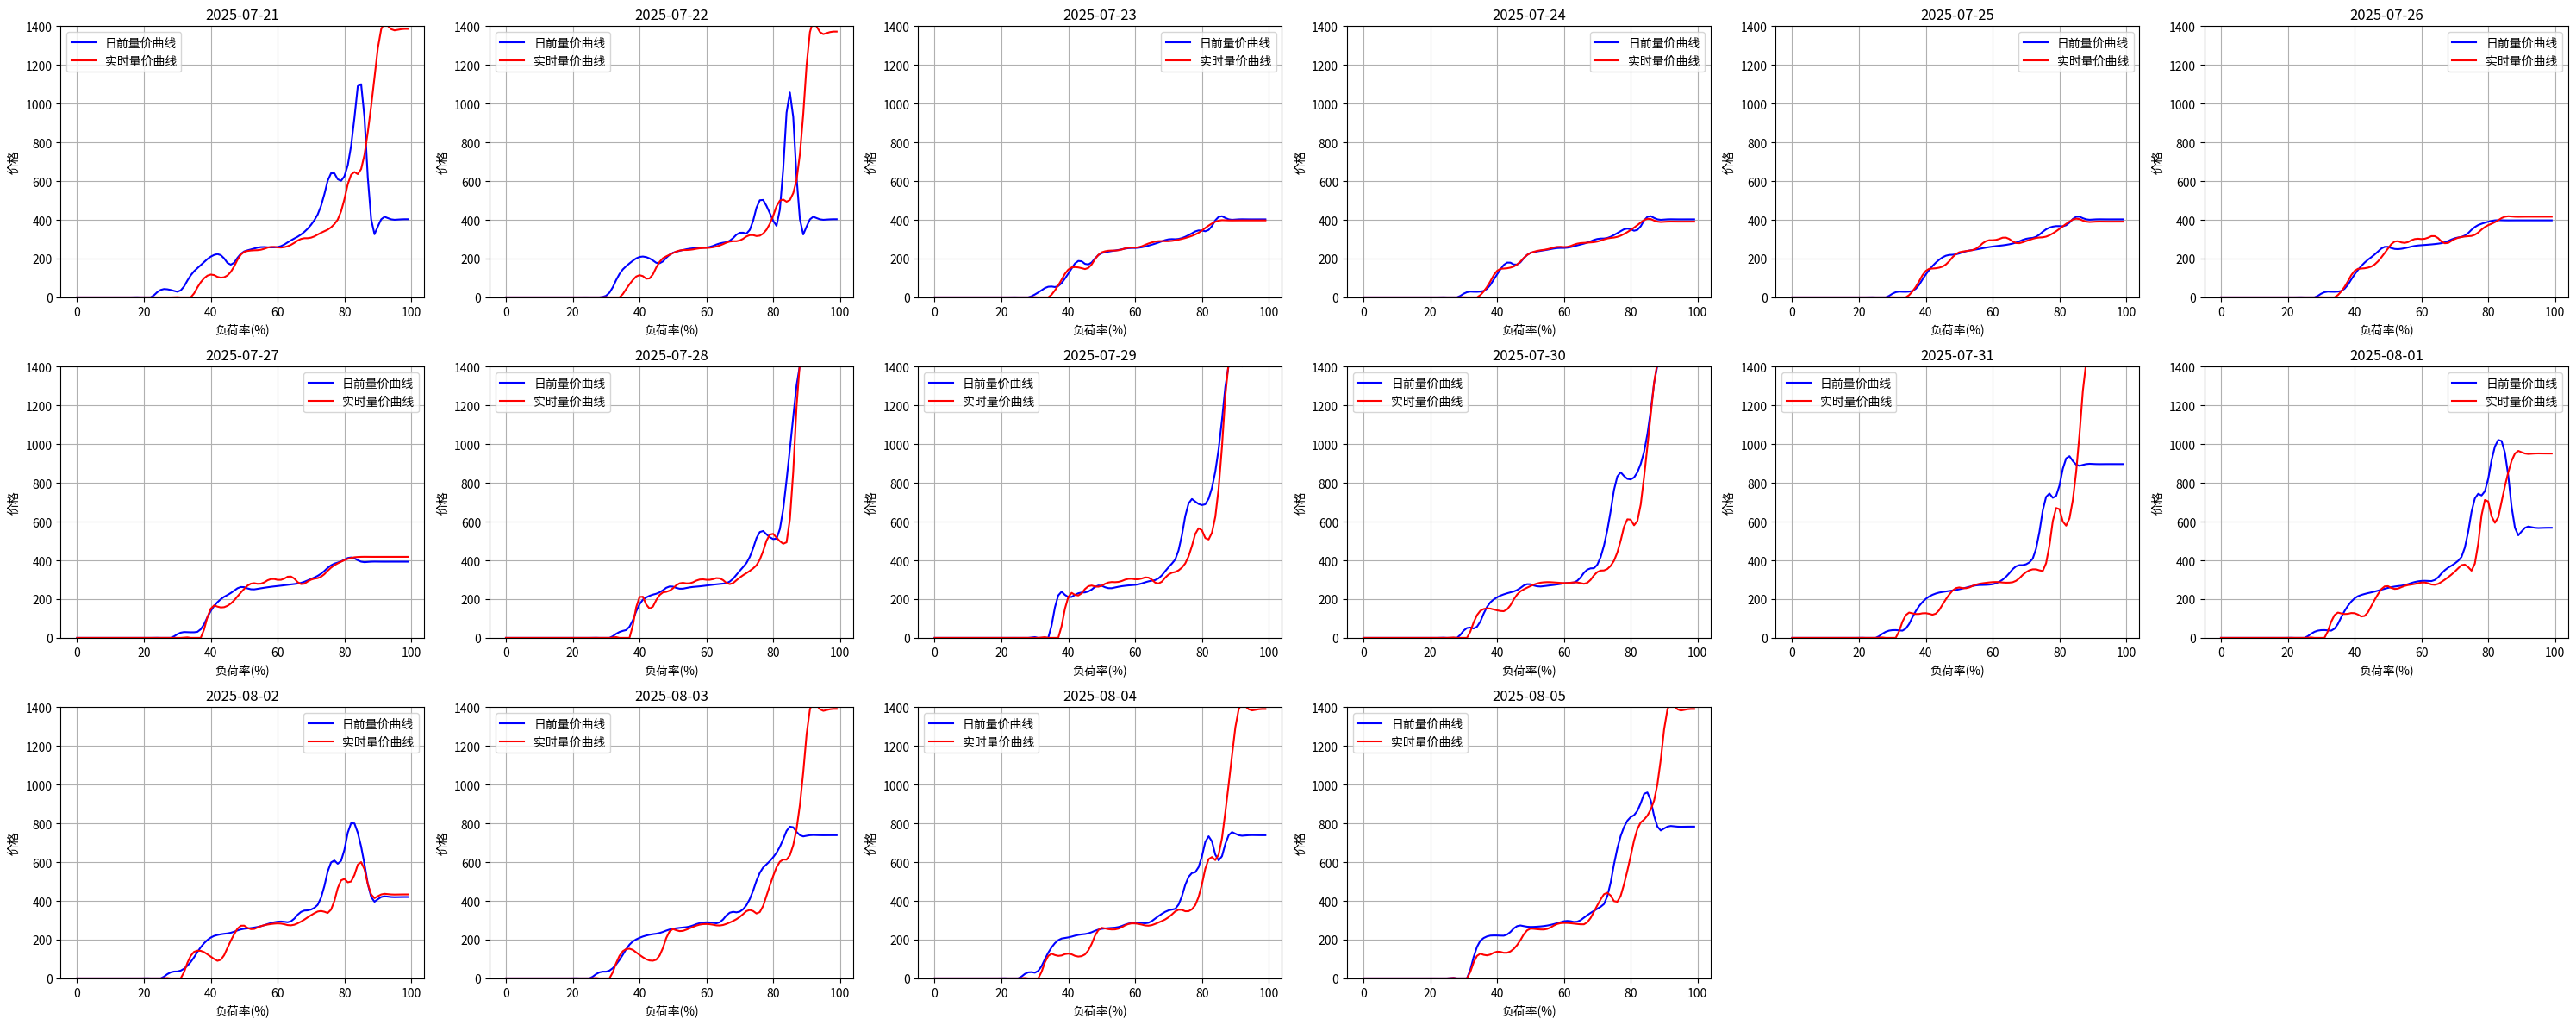

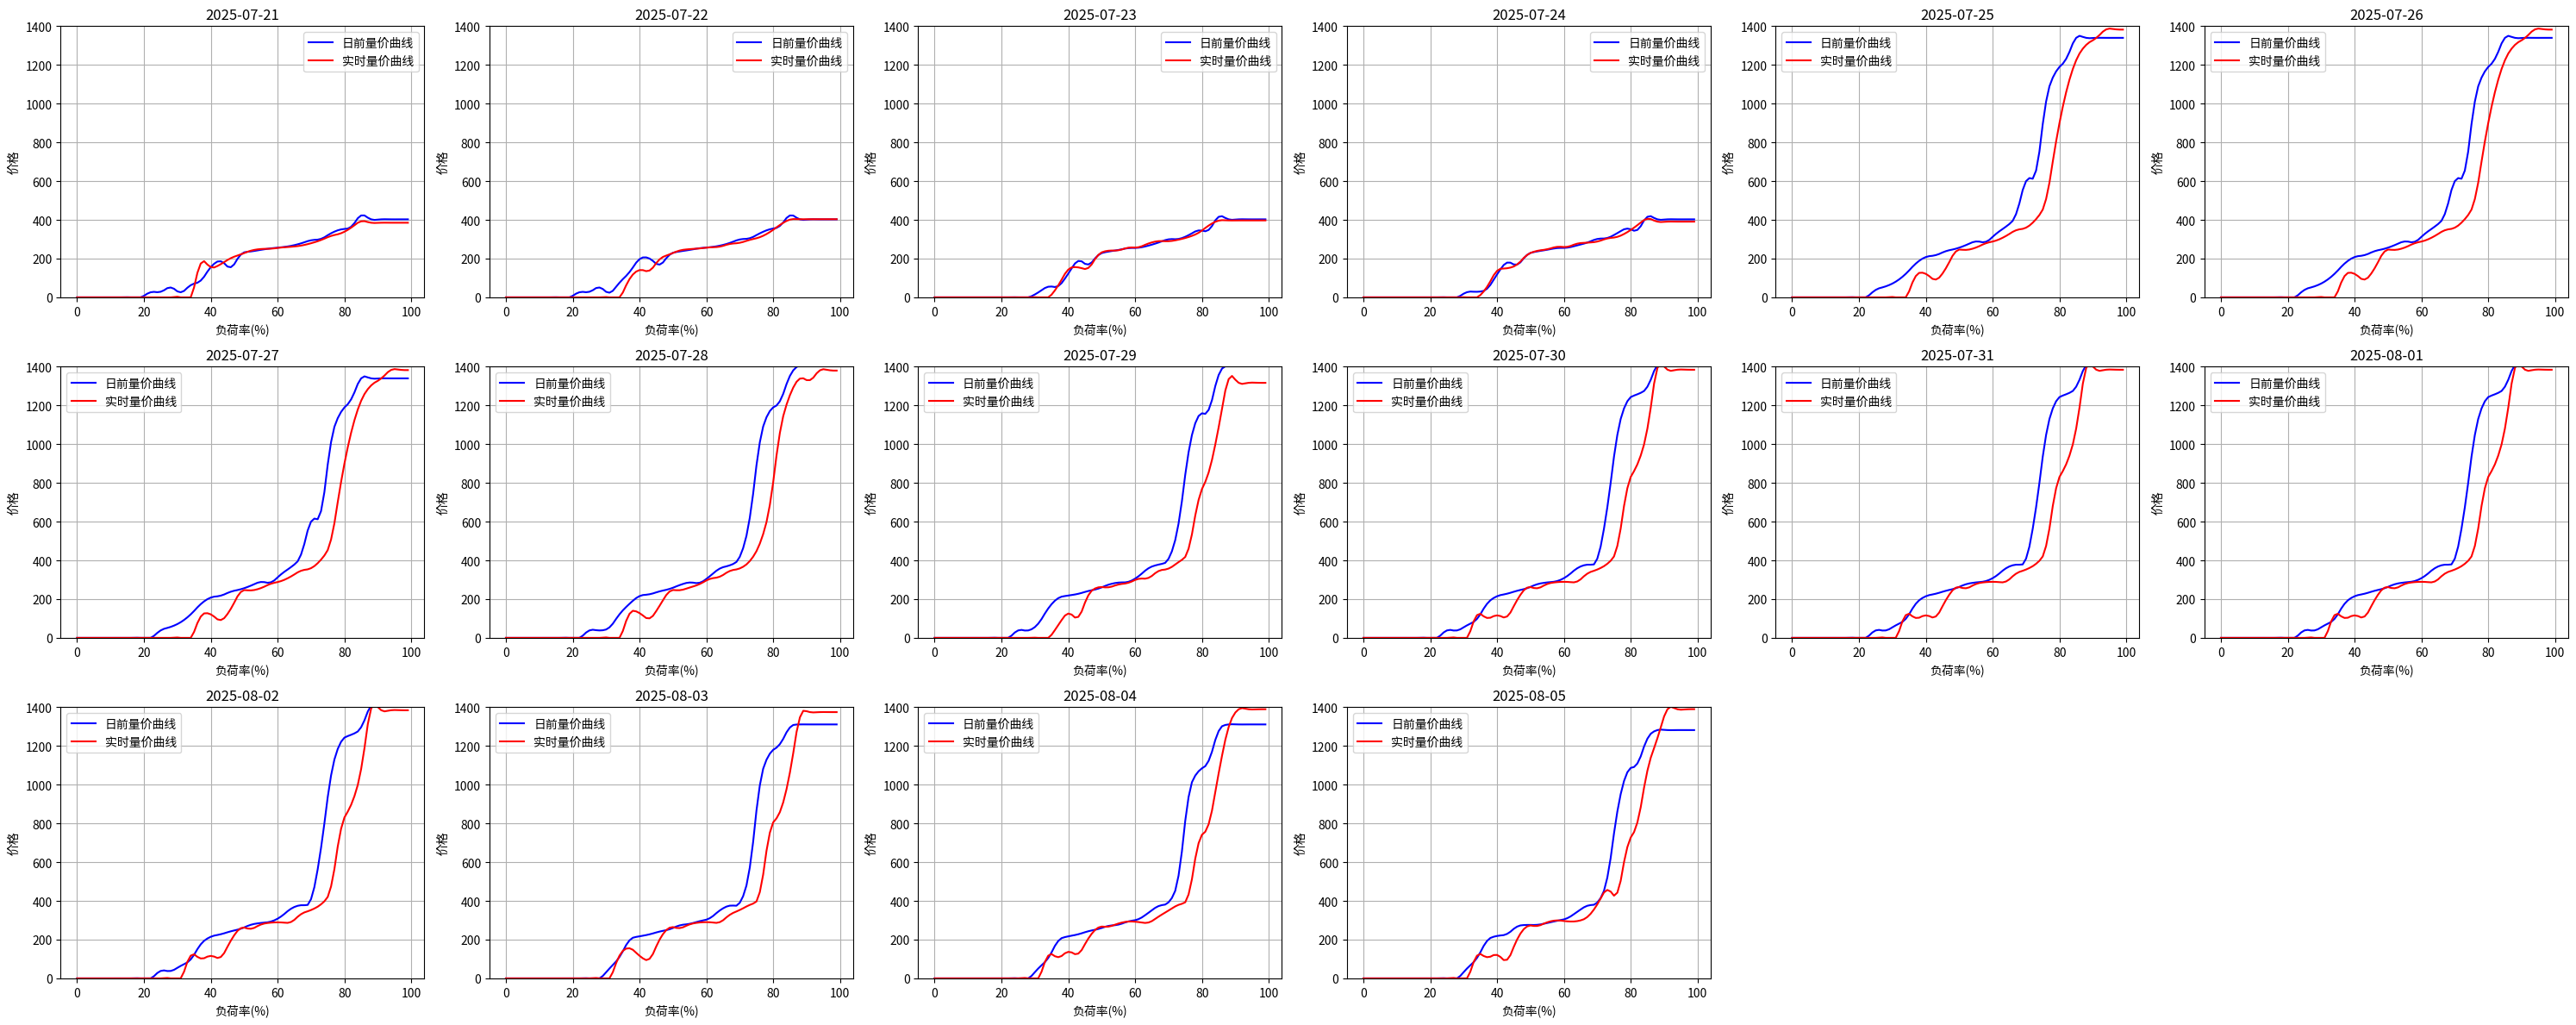

In [5]:
plot_loadrate_price_curves(curves_record_baseline)
plot_loadrate_price_curves(curves_record_match)

# 使用V2版本回测

In [ ]:
# V2版本和V1版本是等价的，这里只是为了使用V2版本兼容性的“回测”接口

Index(['price', '实时价格', '实时在线机组容量(MW)', '实时负荷率(%)', '非市场化机组出力-日内(MW)',
       '联络线计划-日内(MW)', '竞价空间-日内(MW)', '频率实际值(MW)', '实际上旋备用(MW)', '实际下旋备用(MW)',
       '省调负荷-日内(MW)', '新能源负荷-日内(MW)', '实时风电(MW)', '实时光伏(MW)', '水电出力值-日内(MW)',
       '日前在线机组容量(MW)', '日前负荷率(%)', '非市场化机组出力-日前(MW)', '联络线计划-日前(MW)',
       '竞价空间-日前(MW)', '省调负荷-日前(MW)', '新能源负荷-日前(MW)', '正备用-日前(MW)',
       '新能源负荷备用-日前(MW)', '日前光伏(MW)', '日前风电(MW)'],
      dtype='object')


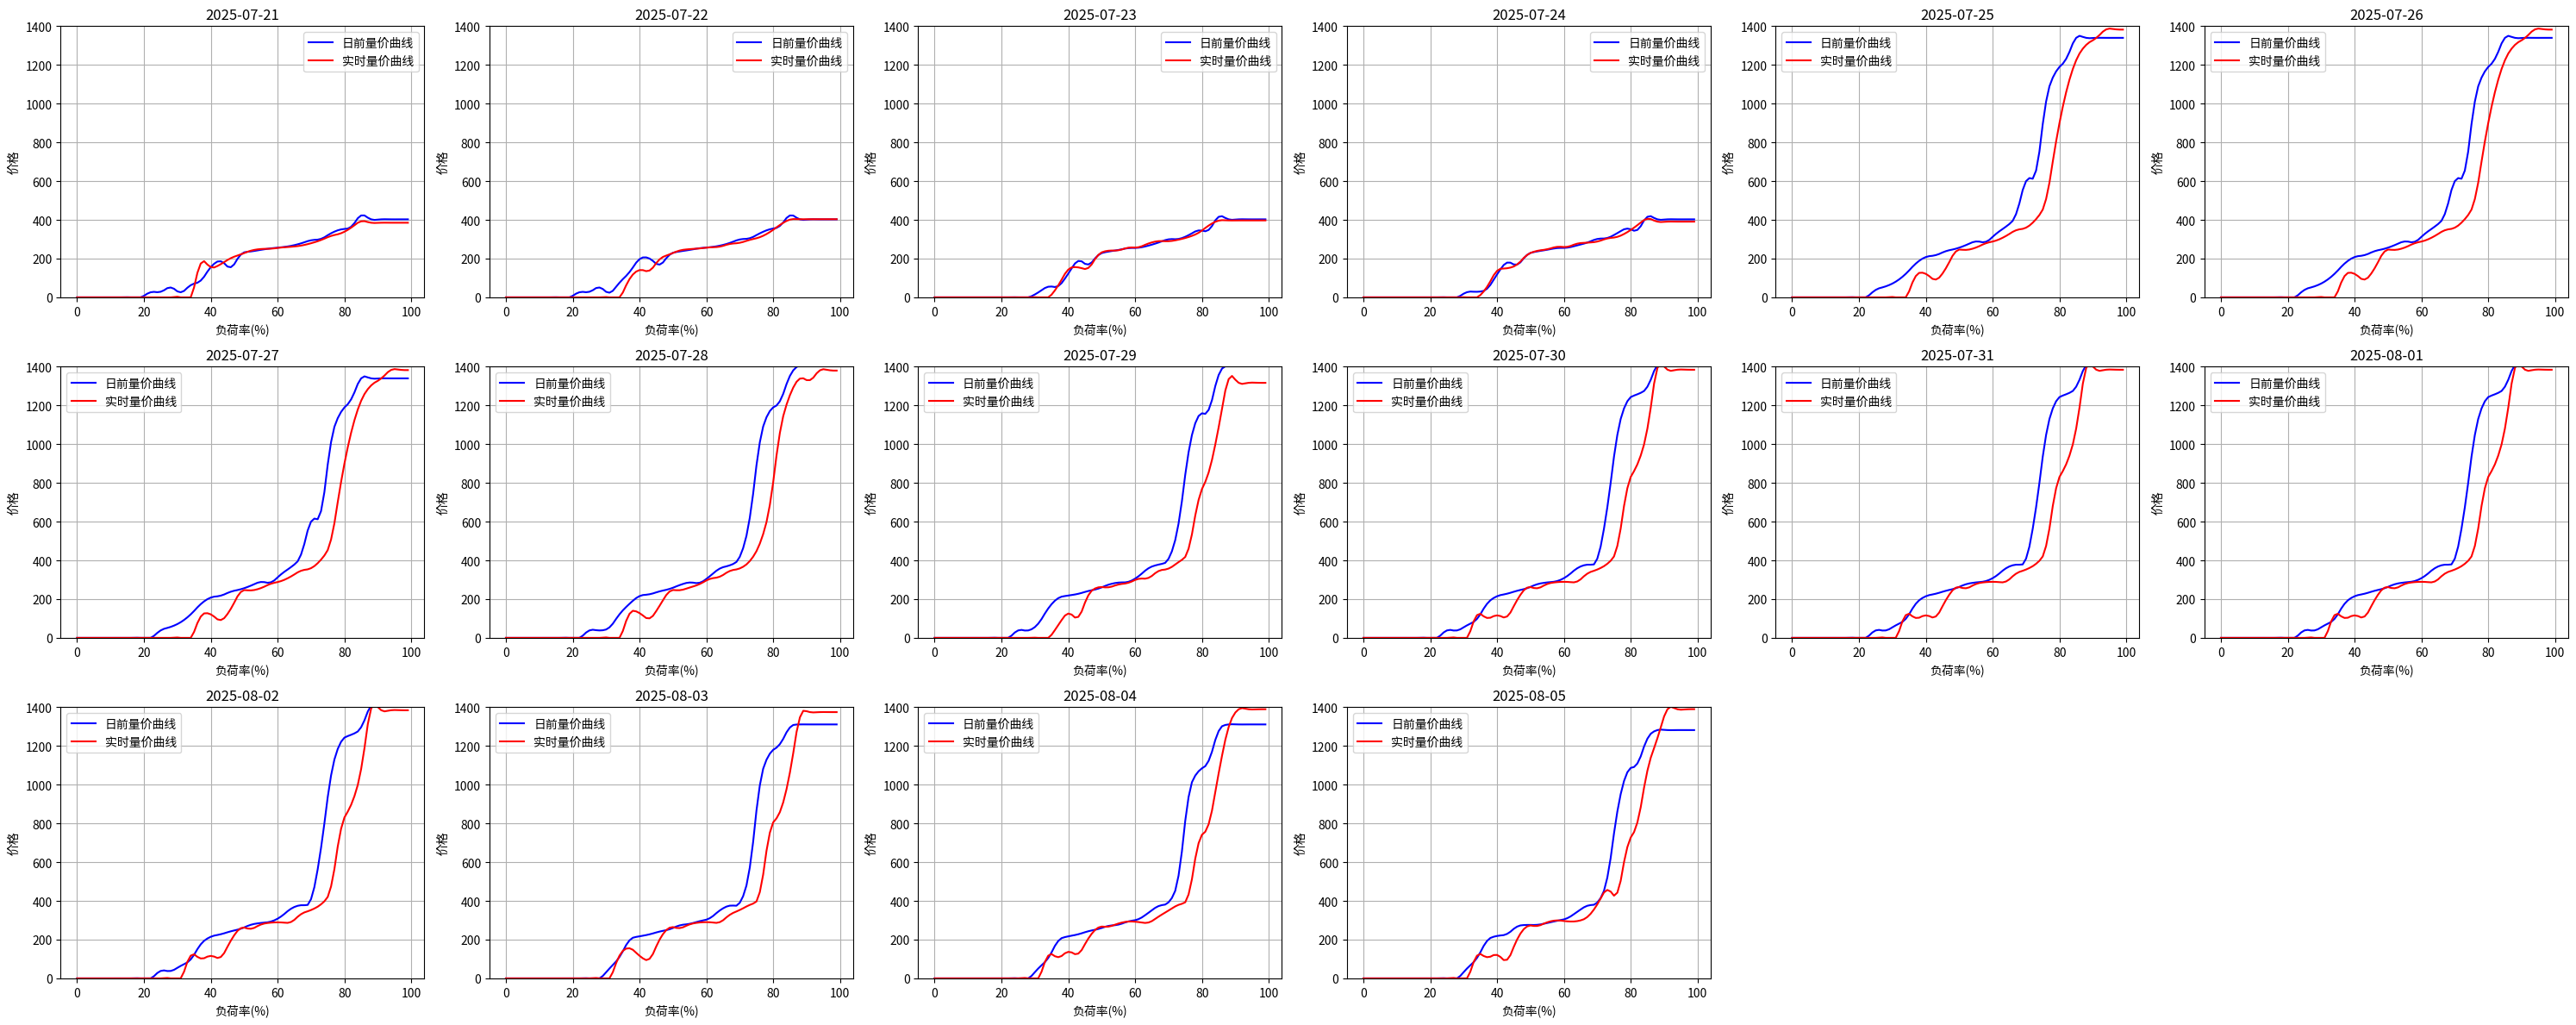

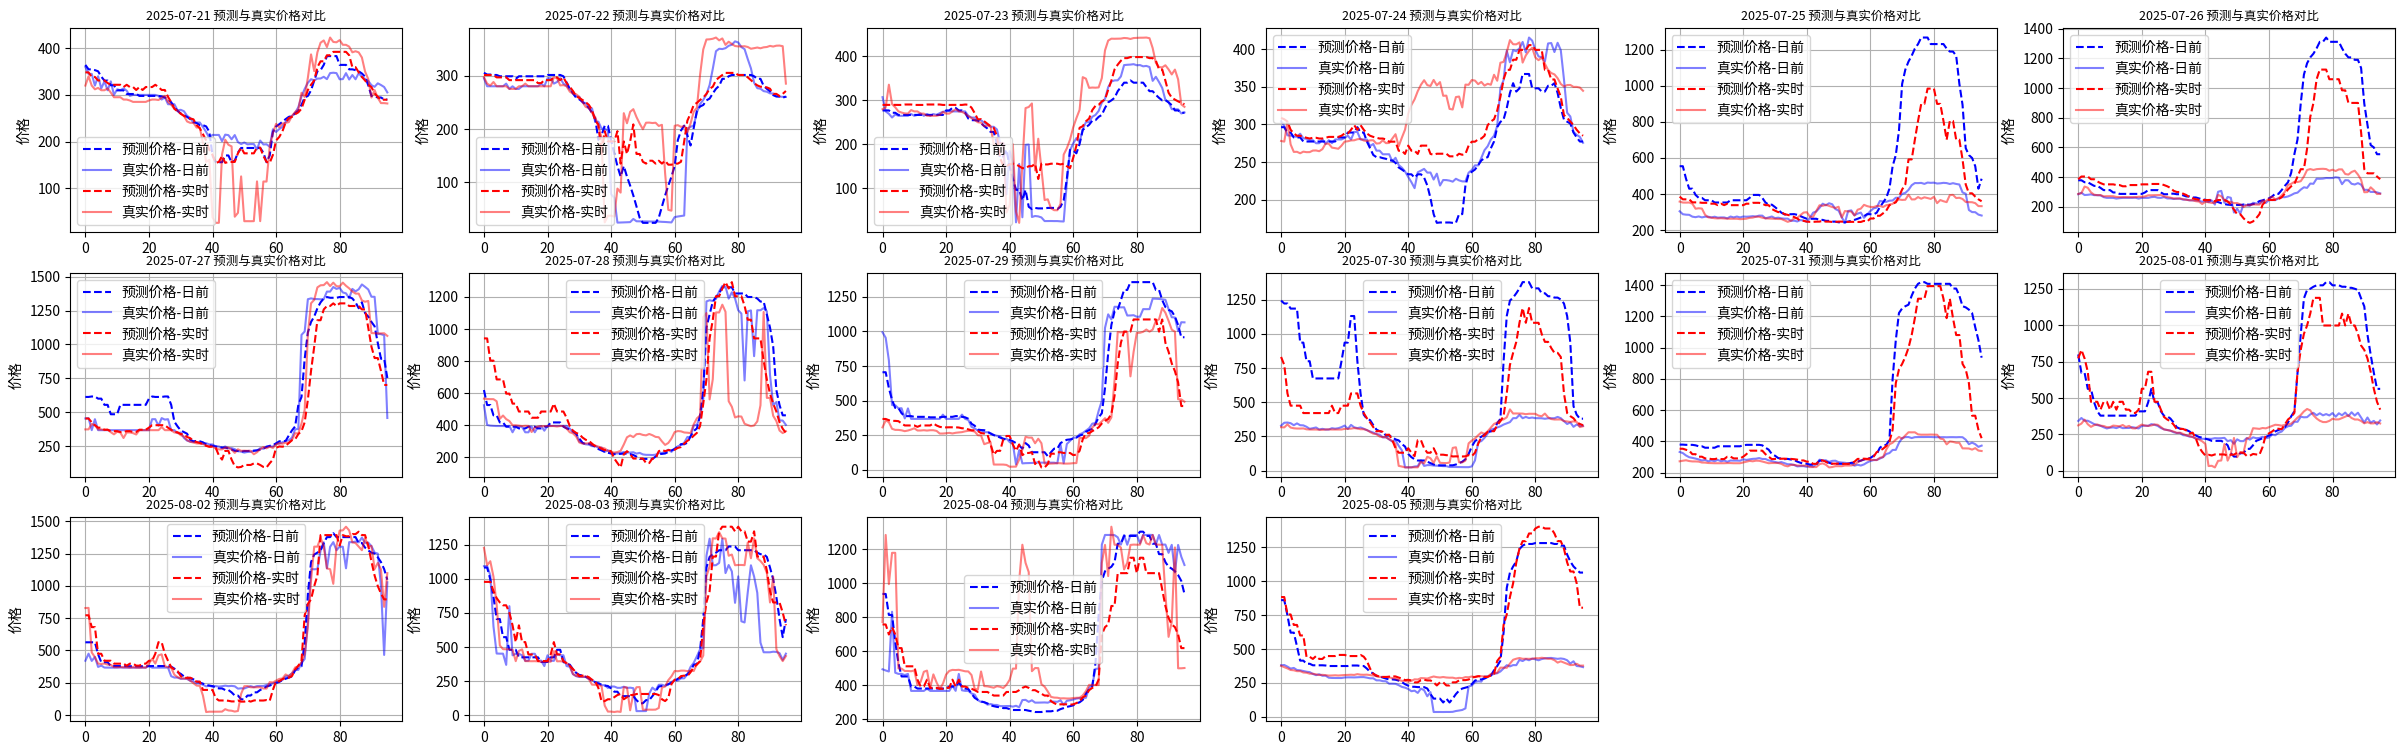

In [6]:
import sys
sys.path.append("../")
from utils.RollingLoadratePrice_utils_V2 import (
    process_market_data,
    build_curves_record_with_history_from_csv,   # 统一入口
    plot_static_curves_unified,                  # 可选：统一画图
    plot_price_timeseries_unified,               # 可选：统一画图
)
from utils.RollingLoadratePrice_utils_V1 import split_correct_wrong_by_csv

# 1) 处理市场数据
market_data = pd.read_parquet("../data/processed/shanxi_new.parquet",engine='fastparquet')
market_data = process_market_data(market_data, date_begin="2025-01-01", date_end="2025-08-05")
pred_csv_path="../save/curve_classify/multi_GRU_predict_results_V2.csv"
truth_csv_path="../data/processed/hiking_01_dataset.csv"
date_begin="2025-07-21" 
date_end="2025-08-05"

# 2) 统一接口（明确指定 backtest + loadrate）
curves_record_match = build_curves_record_with_history_from_csv(
    market_data=market_data,
    date_begin=date_begin,
    date_end=date_end,
    d=5,
    pattern="backtest",     # ← 明确：回测
    x_mode="loadrate",      # ← 明确：负荷率
    pred_csv_path=pred_csv_path,
    truth_csv_path=truth_csv_path,
    selection="match",
)

curves_record_baseline = build_curves_record_with_history_from_csv(
    market_data=market_data,
    date_begin=date_begin,
    date_end=date_end,
    d=5,
    pattern="backtest",
    x_mode="loadrate",
    # baseline 不需要 pred/truth，可直接省略
    selection="baseline",
)

# 3) 对错拆分依旧可用
correct, wrong = split_correct_wrong_by_csv(
    csv_path=pred_csv_path,
    date_begin=date_begin,
    date_end=date_end,
)

# 4)（可选）画图也可以走统一入口
# 多天回测 → 多子图
plot_static_curves_unified(curves_record_match, pattern="backtest", x_mode="loadrate")
plot_price_timeseries_unified(curves_record_match, pattern="backtest")
